In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
q_of_a = np.array([0.25, -0.75, 1.5, 0.5, 1.25, -1.5, -0.25, -1, 0.75,  -0.5])

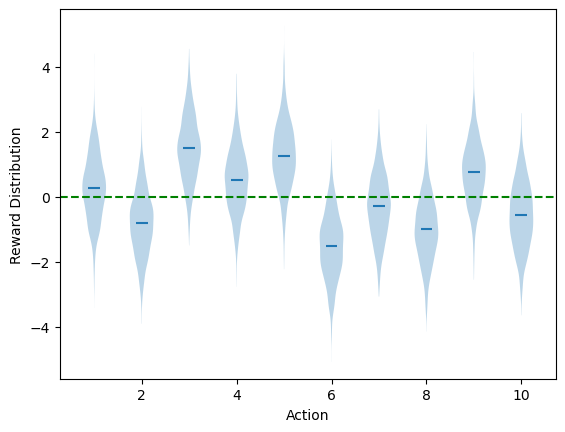

In [129]:
plt.violinplot(np.random.randn(2000,10) + q_of_a,showmeans=True, showextrema=False);
plt.axhline(0,linestyle='--', c= 'g')
plt.xlabel('Action')
plt.ylabel('Reward Distribution')
plt.savefig('figures/Figure2_1.png')
plt.show()

In [79]:
class BanditEnv():
	def __init__(self,rewards):
		self.q_of_a = rewards
		self.a_length = len(rewards)

	def sample_reward(self, action):
		return np.random.randn() + q_of_a[action]

def e_greedy_bandit(env, n_steps, epsilon):
	trajectory = []

	Q_of_a = np.zeros(env.a_length)
	N_of_a = np.zeros(env.a_length)

	for _ in range(n_steps):
		rand = np.random.rand()
		if rand < epsilon:

			action = np.random.choice(list(range(env.a_length)))
			reward = env.sample_reward(action)
		else:
			action = np.random.choice(np.where(Q_of_a == Q_of_a.max())[0])
			reward = env.sample_reward(action)
		N_of_a[action] += 1
		Q_of_a[action] += (reward - Q_of_a[action])/N_of_a[action]

		trajectory.append((np.array([action, reward])))
	
	return Q_of_a, N_of_a, np.array(trajectory)


In [83]:
ten_armed_testbed = BanditEnv(q_of_a)

Q_of_a, N_of_a, trajectory = e_greedy_bandit(ten_armed_testbed, 10000, 0.1)
Q_of_a, N_of_a, trajectory[:5]

(array([ 0.23878295, -0.70891868,  1.49470216,  0.61369636,  1.26962539,
        -1.28361472, -0.33854808, -1.03401365,  0.82193062, -0.58695304]),
 array([ 100.,  107., 9104.,  116.,  100.,   79.,   85.,  101.,  104.,
         104.]),
 array([[ 1.        ,  0.52712683],
        [ 1.        , -0.21428128],
        [ 1.        , -0.05567653],
        [ 1.        , -0.99103728],
        [ 9.        , -1.72720135]]))

In [113]:
def average_over_n_runs(n_runs, env, n_steps, epsilon):
	avg_reward_at_step_t = np.zeros(n_steps)
	q_star = env.q_of_a.argmax()
	optimal_action = np.zeros(n_steps)



	for i in range(1,n_runs + 1):
		_, _, trajectory = e_greedy_bandit(env,n_steps,epsilon)
		avg_reward_at_step_t += trajectory[:,1]
		optimal_action += (trajectory[:,0] == q_star)
	return avg_reward_at_step_t/n_runs, optimal_action/n_runs


In [116]:
hist_01, optimal_01 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.1)
hist_001, optimal_001 = average_over_n_runs(2000,ten_armed_testbed, 1000, 0.01)
hist_0, optimal_0 = average_over_n_runs(2000, ten_armed_testbed, 1000, 0)

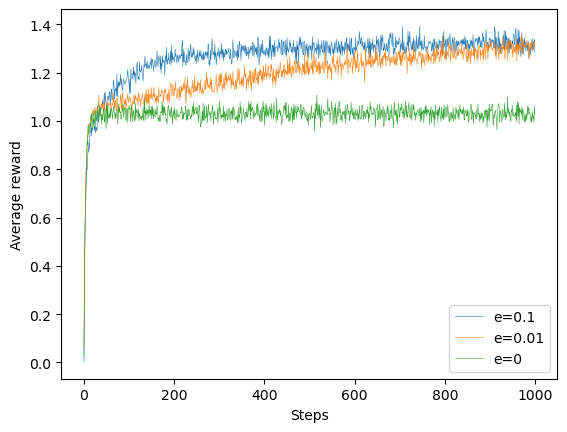

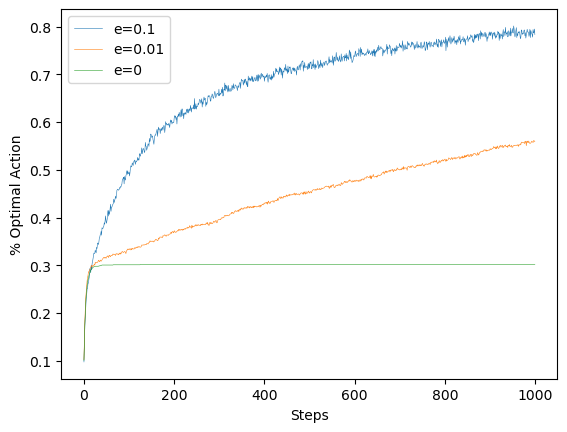

In [130]:
plt.plot(hist_01, linewidth=0.4, label='e=0.1')
plt.plot(hist_001, linewidth=0.4, label='e=0.01')
plt.plot(hist_0, linewidth=0.4, label='e=0')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.savefig('figures/Figure2_2a.png')
plt.show()

plt.plot(optimal_01, linewidth=0.4, label='e=0.1')
plt.plot(optimal_001, linewidth=0.4, label='e=0.01')
plt.plot(optimal_0, linewidth=0.4, label='e=0')

plt.legend()
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.savefig('figures/Figure2_2b.png')
plt.show()